In [1]:
# Load dataset

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
# Each column is numerical, let's check missing values

In [7]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
# There are no missing values

In [10]:
# Check correlation - maybe we'll have some redundant features.

In [12]:
corr = df.corr()

In [15]:
# Let's visualize correlation map
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

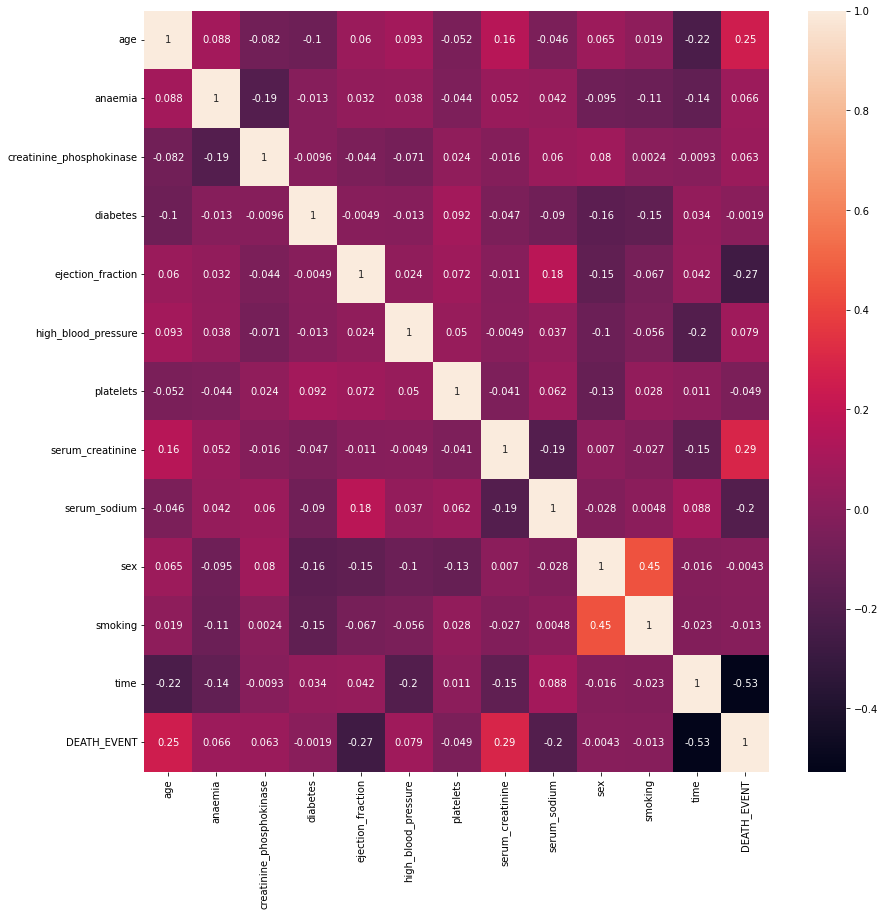

In [16]:
plt.figure(figsize = (14,14))
sns.heatmap(corr, annot=True)

In [ ]:
# There are not high correlated feautres, but really important feature is time, age and serum_creatinine. 

In [9]:
# So, we'd like to test clustering algorithms k-means, dbscan and t-sne on our data. Let's try to 
# build clusters based on each feature describing DEATH_EVENT. Then we'll check how DEATH_EVENT looks like in clusters. 

In [17]:
# K-Means

In [18]:
from sklearn.cluster import KMeans

In [19]:
# This type of clustering bases on distances - so we should scale our data. Let's do it with MinMaxScaler.

In [22]:
X = df.drop(columns=['DEATH_EVENT'])

In [23]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [24]:
Y = df['DEATH_EVENT']

In [25]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_clusters = min_max_scaler.fit_transform(X)

In [27]:
X_clusters

array([[0.63636364, 0.        , 0.07131921, ..., 1.        , 0.        ,
        0.        ],
       [0.27272727, 0.        , 1.        , ..., 1.        , 0.        ,
        0.00711744],
       [0.45454545, 0.        , 0.01569278, ..., 1.        , 1.        ,
        0.01067616],
       ...,
       [0.09090909, 0.        , 0.25988773, ..., 0.        , 0.        ,
        0.97508897],
       [0.09090909, 0.        , 0.30492473, ..., 1.        , 1.        ,
        0.98220641],
       [0.18181818, 0.        , 0.02207196, ..., 1.        , 1.        ,
        1.        ]])

In [28]:
# Let's try 20 clusters and select optimal number with elbow method

In [29]:
sum_sqr_distances = []

clusters = 20
for cluster_no in range(1, clusters):
    K_mean = KMeans(n_clusters=cluster_no)
    K_mean.fit(X_clusters)
    sum_sqr_distances.append(K_mean.inertia_)

C:\Users\Marcin\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  f"KMeans is known to have a memory leak on Windows "


Text(0.5, 1.0, 'Plot for elbow method')

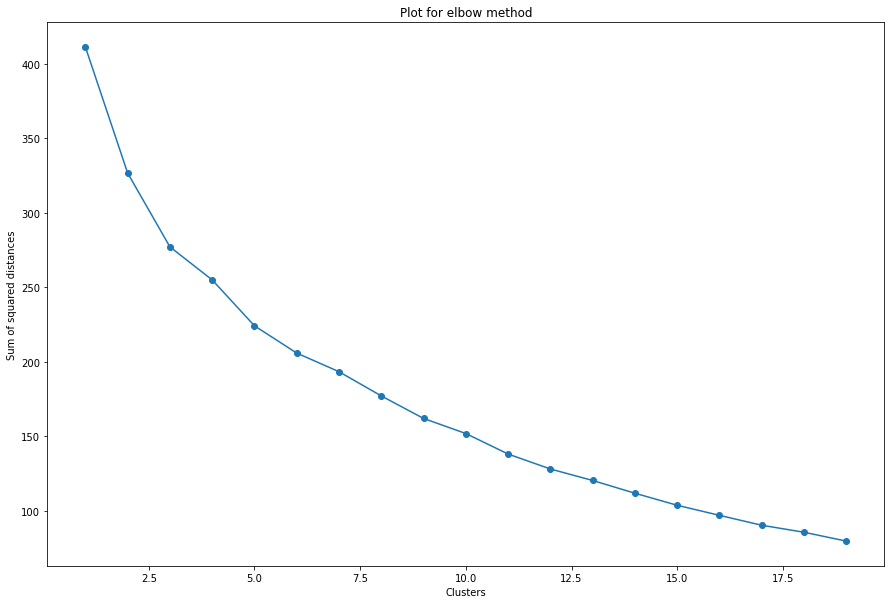

In [30]:
# Elbow method
plt.figure(figsize=(15, 10))
plt.plot(list(range(1, clusters)), sum_sqr_distances, '-o')
plt.xlabel('Clusters')
plt.ylabel('Sum of squared distances')
plt.title('Plot for elbow method')

In [31]:
# It's hard to define an 'elbow' in this picture. We can define it as a place where sum of squared distances starts 
# to decrease linneary, so we can assume that optimal number of clusters is 8.

In [32]:
# So, let's create a model with 8 clusters and analyze it. 

In [33]:
K_mean = KMeans(n_clusters=8)
K_mean.fit(X_clusters)

KMeans()

In [34]:
# Clusters analysis

In [35]:
labels = pd.DataFrame(K_mean.labels_)
labeledData = pd.concat((df, labels), axis = 1)
labeledData = labeledData.rename({0:'labels'},axis=1)

In [37]:
labeledData

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,labels
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,5
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,6
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0,4
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,3
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0,3
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0,5


In [39]:
# We have 8 clusters - each contain different number of samples
labeledData['labels'].value_counts()

5    55
6    45
0    44
2    37
1    32
3    32
7    29
4    25
Name: labels, dtype: int64

In [40]:
# Let's check content of each clusters (DEATH EVENT)
for cluster_no in range(8):
    print("Cluster "+str(cluster_no))
    print(labeledData[labeledData['labels']==cluster_no]['DEATH_EVENT'].value_counts())

Cluster 0
0    27
1    17
Name: DEATH_EVENT, dtype: int64
Cluster 1
0    20
1    12
Name: DEATH_EVENT, dtype: int64
Cluster 2
0    26
1    11
Name: DEATH_EVENT, dtype: int64
Cluster 3
0    24
1     8
Name: DEATH_EVENT, dtype: int64
Cluster 4
0    14
1    11
Name: DEATH_EVENT, dtype: int64
Cluster 5
0    43
1    12
Name: DEATH_EVENT, dtype: int64
Cluster 6
0    29
1    16
Name: DEATH_EVENT, dtype: int64
Cluster 7
0    20
1     9
Name: DEATH_EVENT, dtype: int64


In [41]:
# In each cluster we can observe different number of DEATH EVENTs. We can guess that each cluster describes another
# characteristic group of people. Groups will probably differ each other with characteristic statistics - so let's
# check them. 

In [42]:
cluster_desc = []
for cluster_no in range(8):
    print("Cluster "+str(cluster_no))
    desc = labeledData[labeledData['labels']==cluster_no].describe()
    cluster_desc.append(desc)
    print(desc)

Cluster 0
             age    anaemia  creatinine_phosphokinase   diabetes  \
count  44.000000  44.000000                 44.000000  44.000000   
mean   60.878795   0.522727                398.045455   0.500000   
std    11.676317   0.505258                454.630438   0.505781   
min    40.000000   0.000000                 52.000000   0.000000   
25%    50.000000   0.000000                108.000000   0.000000   
50%    60.000000   1.000000                238.500000   0.500000   
75%    70.000000   1.000000                582.000000   1.000000   
max    95.000000   1.000000               2522.000000   1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count          44.000000                 44.0      44.000000   
mean           37.659091                  1.0  288365.320227   
std            11.368956                  0.0   96699.463439   
min            17.000000                  1.0  127000.000000   
25%            30.000000                  1.0  233500.000

             age  anaemia  creatinine_phosphokinase   diabetes  \
count  29.000000     29.0                 29.000000  29.000000   
mean   58.620690      1.0                409.275862   0.551724   
std    11.638648      0.0                578.649036   0.506120   
min    40.000000      1.0                 58.000000   0.000000   
25%    50.000000      1.0                101.000000   0.000000   
50%    60.000000      1.0                167.000000   1.000000   
75%    65.000000      1.0                400.000000   1.000000   
max    90.000000      1.0               2334.000000   1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count          29.000000                 29.0      29.000000   
mean           43.137931                  0.0  260620.689655   
std            13.359652                  0.0   94314.221694   
min            15.000000                  0.0   75000.000000   
25%            35.000000                  0.0  208000.000000   
50%            40.000

In [43]:
# This kind of description is not visible enough. So let's focus on mean (or standard deviation) and visualize it with 
# plots.

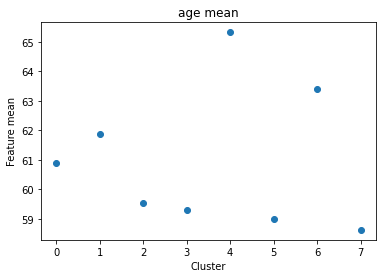

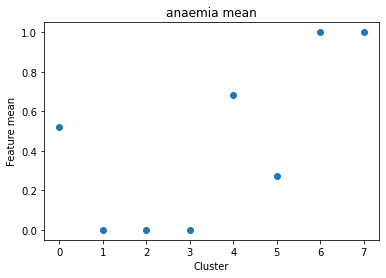

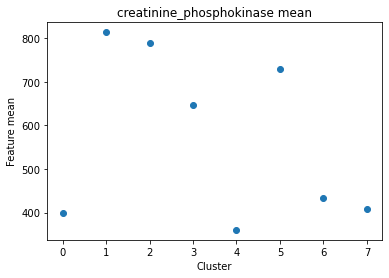

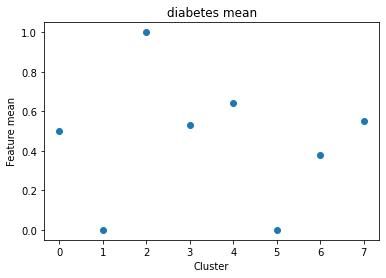

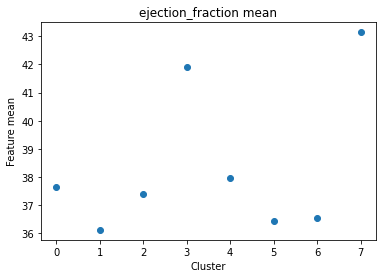

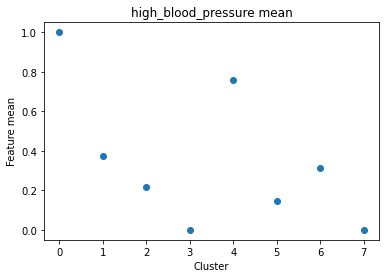

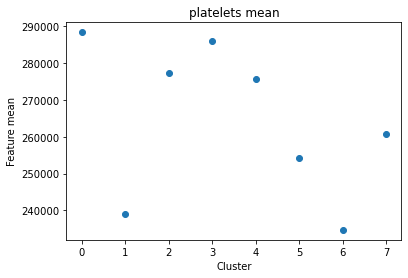

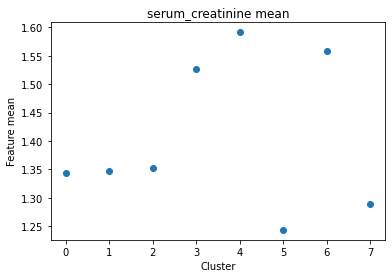

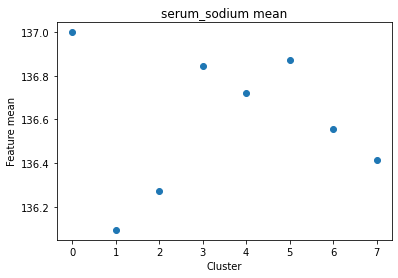

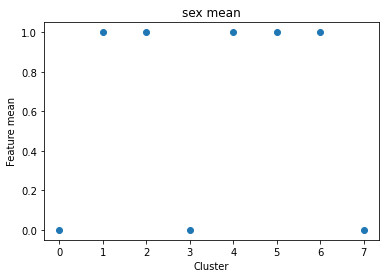

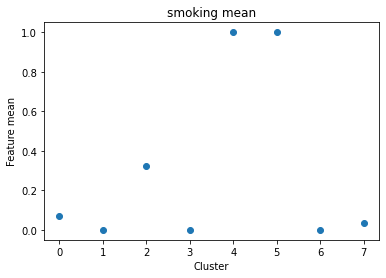

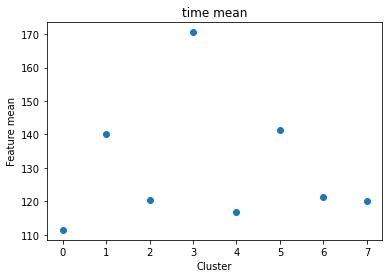

In [48]:
cols_to_compare = labeledData.columns[:-2]
param_name = 'mean' # std

for col_to_comp in cols_to_compare:
    plt.figure()
    param_list = [cluster_description[col_to_comp][param_name] for cluster_description in cluster_desc]
    plt.scatter(list(range(len(param_list))), param_list)
    plt.xlabel('Cluster')
    plt.ylabel('Feature '+param_name)
    plt.title(col_to_comp + ' ' + param_name)

In [49]:
# Now we can try to describe our clusters. So I provided a description of people (data) in each cluster below:

In [52]:
# 0. Lowest time mean, highest serum_sodium and platelets and high_blood_preasure. Death event ratio (0/1) = 0.38.
#    only woman.
# 1. One of the lowest anemia and diabetes mean, highest creatinine. Lowest ejection fraction and serum_sodium mean.
#    only man. Death event ratin (0/1) = 0.375.
# 2. Highest diabetes mean, one of the lowest anemia mean, only man. Death event ratio (0/1) = 0.3.
# 3. One of the lowest anemia mean, high_blood_pressure and highest ejection_fraction, only woman. Highest time mean.
#    Death event ratio (0/1) = 0.25.
# 4. One of the highest smoking mean, only man. Highest serum sreatinine mean, lowest creatinine phosphokinease.
#    Highest age mean. Death event ratio (0/1) = 0.44.
# 5. One of the highest smoking meanonly man. Death event ratio (0/1) = 0.21.
# 6. Highest anemia mean, only man. Lowest platelets. Really low smoking mean. Death event ratio (0/1) = 0.36.
# 7. Highest anemia mean, highest ejection mean, only woman. Lowest age and high blood pressure. 
#    Really low smoking mean. Death event ratio (0/1) = 0.31.

In [53]:
# Hierarchic

In [54]:
import scipy.cluster.hierarchy as shc

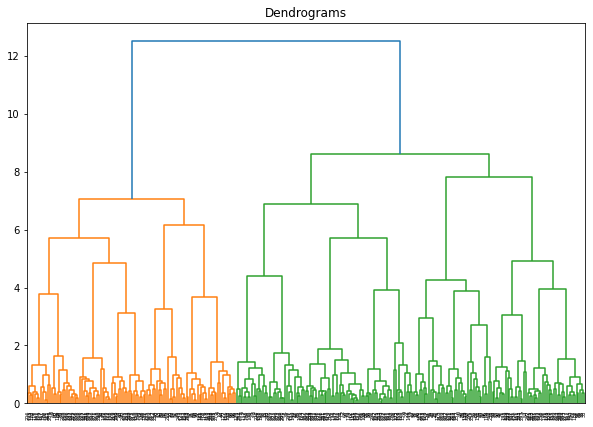

In [55]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dendrograms = shc.dendrogram(shc.linkage(X_clusters, method='ward'))

In [56]:
# We can observe a dendrogram and we assume that the longest vertical lines are for threshold ~9-13. So we choose 2 
# clusters for this kind of classification.

In [57]:
# Let's create 2 clusters
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X_clusters)

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0], dtyp

In [58]:
labels_hier = pd.DataFrame(cluster.labels_)
labeledDataHier = pd.concat((df, labels_hier), axis = 1)
labeledDataHier = labeledDataHier.rename({0:'labels'},axis=1)

In [62]:
# Let's check clusters content
for cluster_no in range(2):
    print("Cluster "+str(cluster_no))
    print(labeledDataHier[labeledDataHier['labels']==cluster_no]['DEATH_EVENT'].value_counts())

Cluster 0
0    125
1     62
Name: DEATH_EVENT, dtype: int64
Cluster 1
0    78
1    34
Name: DEATH_EVENT, dtype: int64


In [ ]:
# Clusters are ballancec in DEATH_EVENT ratio
# 0 - 62/(62+125) = 0.33
# 1 - 34/(34+78) = 0.3

In [66]:
# So lets check a describe of each cluster

In [67]:
cluster_desc_hier = []
for cluster_no in range(2):
    print("Cluster "+str(cluster_no))
    desc = labeledDataHier[labeledDataHier['labels']==cluster_no].describe()
    cluster_desc_hier.append(desc)
    print(desc)

Cluster 0
              age     anaemia  creatinine_phosphokinase    diabetes  \
count  187.000000  187.000000                187.000000  187.000000   
mean    61.265599    0.363636                639.331551    0.385027   
std     12.248967    0.482337               1121.776561    0.487908   
min     40.000000    0.000000                 23.000000    0.000000   
25%     52.000000    0.000000                118.500000    0.000000   
50%     60.000000    0.000000                253.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         187.000000           187.000000     187.000000   
mean           36.673797             0.283422  257740.483690   
std            11.021753             0.451870   98264.139399   
min            14.000000             0.000000   25100.000000   
25%            30.000000      

In [69]:
# And visualize it

In [70]:
cols_to_compare_hier = labeledDataHier.columns[:-2]
param_name = 'mean' # std

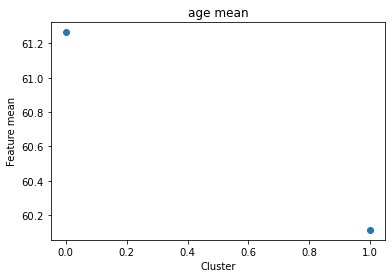

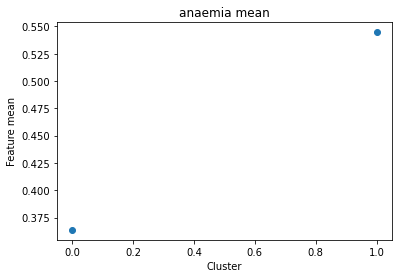

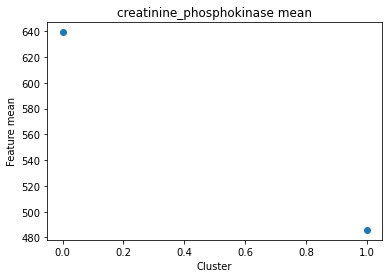

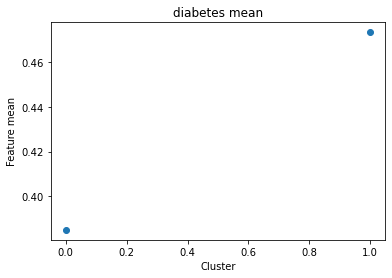

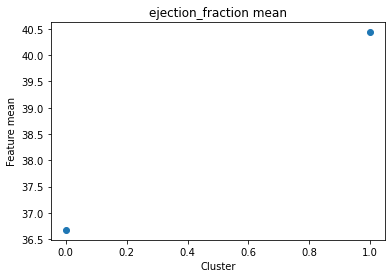

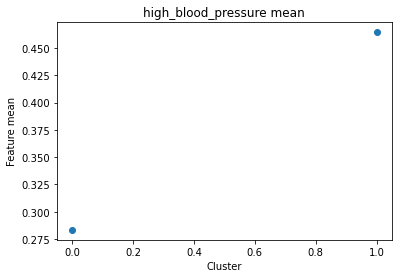

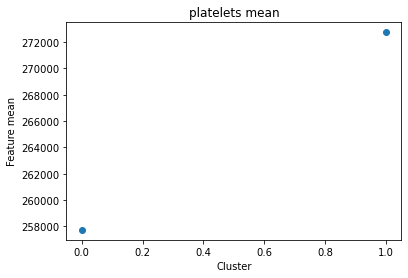

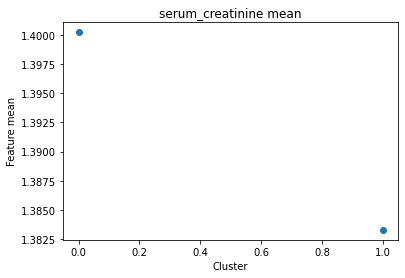

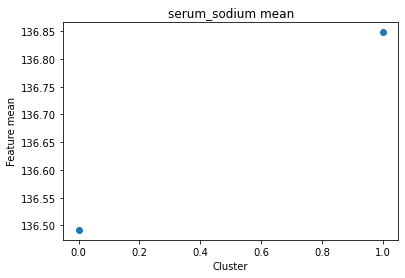

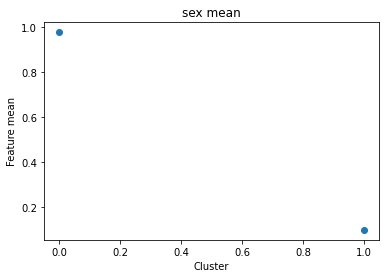

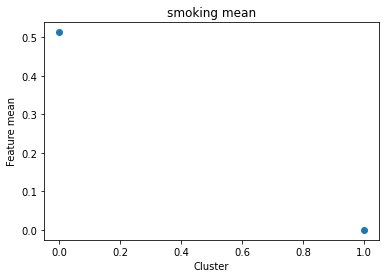

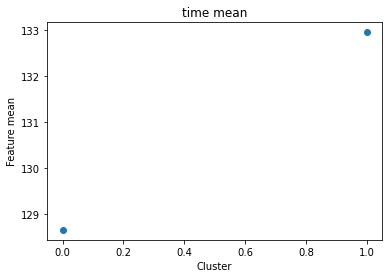

In [108]:
for col_to_comp in cols_to_compare_hier:
    plt.figure()
    param_list = [cluster_description[col_to_comp][param_name] for cluster_description in cluster_desc_hier]
    plt.scatter(list(range(len(param_list))), param_list)
    plt.xlabel('Cluster')
    plt.ylabel('Feature '+param_name)
    plt.title(col_to_comp + ' ' + param_name)

In [73]:
# The main difference between each cluster is that a sex. We have a great distriburtion by this feature. First 
# cluster contains mainly man and the second one - woman. 

In [74]:
# Let's check clusters content
for cluster_no in range(2):
    print("Cluster "+str(cluster_no))
    print(labeledDataHier[labeledDataHier['labels']==cluster_no]['sex'].value_counts())

Cluster 0
1    183
0      4
Name: sex, dtype: int64
Cluster 1
0    101
1     11
Name: sex, dtype: int64


In [75]:
# So, we can assume that it's easy to clusterize data by features related to sex. It may be a true, because 
# it's a clinical data and may be differ for woman and man. 

In [76]:
# DBScan

In [77]:
# In DBScan algorithm we have to set eps and min_points. 
# min_poins will be greater than our data dimensions + 1 (according to: https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/)
# eps will be set based on data distances calculated by NearestNeighbour algorithm.

In [78]:
from sklearn.neighbors import NearestNeighbors

In [79]:
nghbrs = NearestNeighbors(n_neighbors=2)

In [80]:
nbrs = nghbrs.fit(X_clusters)

In [81]:
distances, indices = nbrs.kneighbors(X_clusters)

In [83]:
import numpy as np
distances = np.sort(distances, axis=0)

In [84]:
distances = distances[:, 1]

Text(0, 0.5, 'Distances between point and its nearest neighbour -> eps')

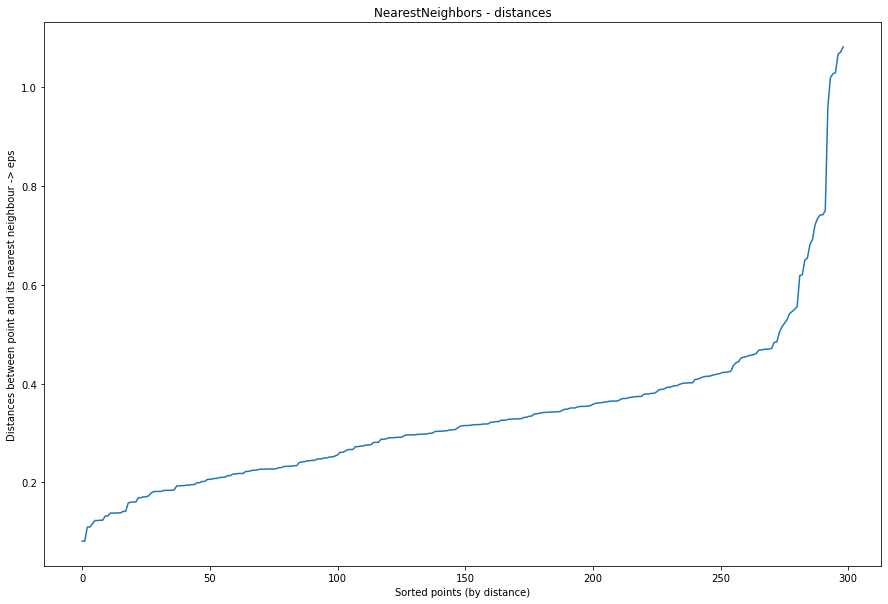

In [85]:
# Sorted distances
plt.figure(figsize=(15,10))
plt.plot(list(range(len(distances))), distances)
plt.title('NearestNeighbors - distances')
plt.xlabel('Sorted points (by distance)')
plt.ylabel('Distances between point and its nearest neighbour -> eps')

In [87]:
# Oprimal eps value will be at the point of maximal curvature -> so eps = 0.5
# https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc

In [98]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.85, min_samples=15)

In [99]:
dbscan.fit(X_clusters)

DBSCAN(eps=0.85, min_samples=15)

In [100]:
# Add labels to dataframe
labels_dbscan = pd.DataFrame(dbscan.labels_)
labeledDataDBScan = pd.concat((df, labels_dbscan), axis = 1)
labeledDataDBScan = labeledDataDBScan.rename({0:'labels'},axis=1)

In [101]:
labeledDataDBScan['labels'].value_counts()

-1    153
 0     32
 4     19
 1     17
 2     17
 7     16
 6     15
 5     15
 3     15
Name: labels, dtype: int64

In [102]:
# A lot of data were classified by a noise. This algorithm is really robust to outliers.

In [113]:
cluster_desc_db = []
# Cluster description
for cluster_no in range(8):
    print("Cluster "+str(cluster_no))
    desc = labeledDataDBScan[labeledDataDBScan['labels']==cluster_no].describe()
    cluster_desc_db.append(desc)
    print(desc)

Cluster 0
             age  anaemia  creatinine_phosphokinase  diabetes  \
count  32.000000     32.0                 32.000000      32.0   
mean   59.437500      0.0               1050.593750       0.0   
std    13.392192      0.0               1596.567141       0.0   
min    40.000000      0.0                 56.000000       0.0   
25%    50.000000      0.0                126.250000       0.0   
50%    55.000000      0.0                237.000000       0.0   
75%    69.000000      0.0               1001.750000       0.0   
max    85.000000      0.0               5882.000000       0.0   

       ejection_fraction  high_blood_pressure      platelets  \
count          32.000000                 32.0      32.000000   
mean           36.687500                  0.0  245377.315313   
std            10.642088                  0.0   85874.157001   
min            20.000000                  0.0   51000.000000   
25%            30.000000                  0.0  209750.000000   
50%            35.00

In [114]:
# And visualization

In [115]:
cols_to_compare_db = labeledDataDBScan.columns[:-2]
param_name = 'mean' # std

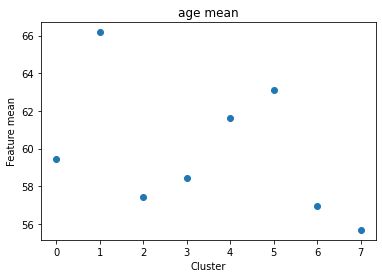

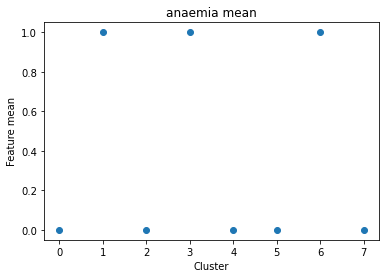

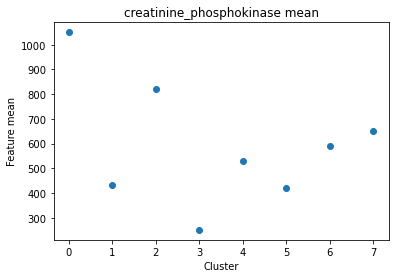

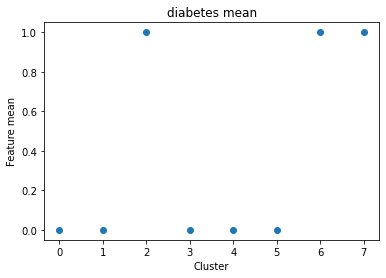

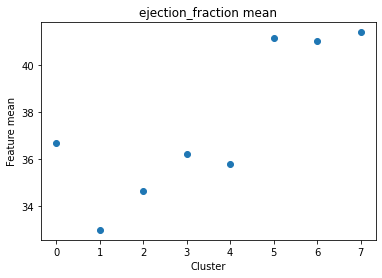

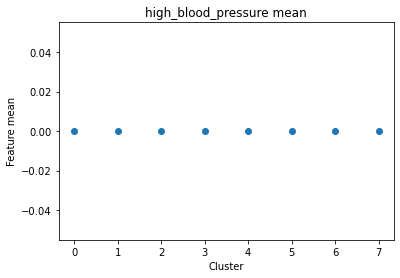

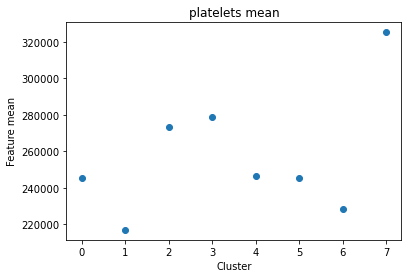

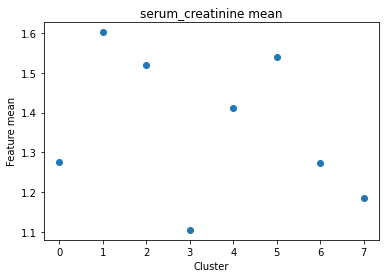

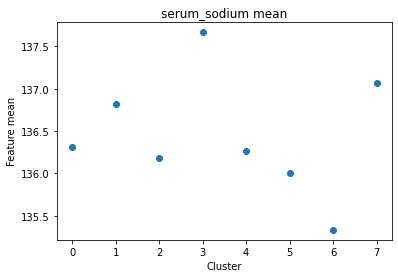

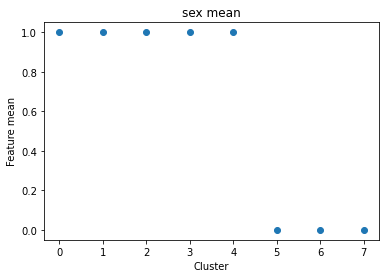

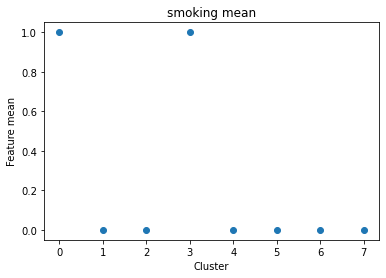

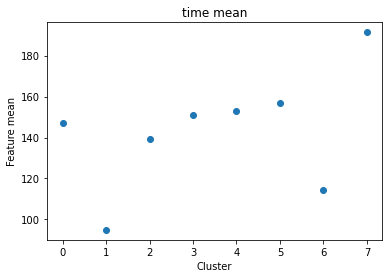

In [116]:
for col_to_comp in cols_to_compare_db:
    plt.figure()
    param_list = [cluster_description[col_to_comp][param_name] for cluster_description in cluster_desc_db]
    plt.scatter(list(range(len(param_list))), param_list)
    plt.xlabel('Cluster')
    plt.ylabel('Feature '+param_name)
    plt.title(col_to_comp + ' ' + param_name)

In [117]:
# Let's check content of each clusters (DEATH EVENT)
for cluster_no in range(8):
    print("Cluster "+str(cluster_no))
    print(labeledDataDBScan[labeledDataDBScan['labels']==cluster_no]['DEATH_EVENT'].value_counts())

Cluster 0
0    26
1     6
Name: DEATH_EVENT, dtype: int64
Cluster 1
1    10
0     7
Name: DEATH_EVENT, dtype: int64
Cluster 2
0    13
1     4
Name: DEATH_EVENT, dtype: int64
Cluster 3
0    12
1     3
Name: DEATH_EVENT, dtype: int64
Cluster 4
0    12
1     7
Name: DEATH_EVENT, dtype: int64
Cluster 5
0    10
1     5
Name: DEATH_EVENT, dtype: int64
Cluster 6
0    9
1    6
Name: DEATH_EVENT, dtype: int64
Cluster 7
0    14
1     2
Name: DEATH_EVENT, dtype: int64


In [118]:
# This algorithm gave us 8 clusters and one noise cluster (not analyzed above). First five clusters contian
# information about man and last three - about woman. There are not big differs in DEATH_EVENT among clusters. 
# Thanks to visualization we can focus on our clusters like in kMeans approach. In DBScan we have a lot of data
# marked as noise (-1). So, our analysis will be not complete. We can only focus on some part of characteristic data.

In [119]:
# Sum up

In [121]:
# To sum up - three classifiers have been studied. Each of them differs in its approach and parameter selection. 
# In the case of DBScan, a significant amount of data were considere as noise and a full analysis was not 
# possible. In my opinion, it is worth focusing on kMeans clustering and the elbow method, and hierarchical clustering 
# and the dendrogram method.